In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
data = pd.read_csv("data3a.csv")

In [9]:
data.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [12]:
model_1 = smf.glm("y ~ 1", data=data, family=sm.families.Poisson())
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Mon, 05 Aug 2019   Deviance:                       89.507
Time:                        00:54:00   Pearson chi2:                     87.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128
==============================================================================
"""

In [13]:
model_2 = smf.glm('y~x',data=data,family=sm.families.Poisson())
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 05 Aug 2019   Deviance:                       84.993
Time:                        00:54:36   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [14]:
np.exp(result_1.llf)/np.exp(result_2.llf)

0.10466708976326321

In [17]:
result_1.deviance - result_2.deviance

4.51394107885173

In [20]:
result_1.params[0]

2.0579625100027115

In [21]:
np.exp(result_1.params[0])

7.829999999999998

In [22]:
np.random.seed(10)
data["y_rand"] = np.random.poisson(np.exp(result_1.params[0]),100)

In [23]:
data.head()

,y,x,f,y_rand
0,6,8.31,C,6
1,6,9.44,C,5
2,6,9.50,C,11
3,12,9.07,C,10
4,10,10.16,C,6


In [24]:
data.y_rand.mean()

7.45

In [25]:
model_1_rand = smf.glm('y_rand~1',data=data,family=sm.families.Poisson())
model_2_rand = smf.glm('y_rand~x',data=data,family=sm.families.Poisson())
result_1_rand = model_1_rand.fit()
result_2_rand = model_2_rand.fit()
result_1_rand.deviance - result_2_rand.deviance

2.706833788509016

In [26]:
deviance_list = list()
for i in range(1000):
    data["y_rand"] = np.random.poisson(np.exp(result_1.params[0]),100)
    model_1_rand = smf.glm('y_rand~1',data=data,family=sm.families.Poisson())
    model_2_rand = smf.glm('y_rand~x',data=data,family=sm.families.Poisson())
    result_1_rand = model_1_rand.fit()
    result_2_rand = model_2_rand.fit()
    deviance_list.append(result_1_rand.deviance - result_2_rand.deviance)

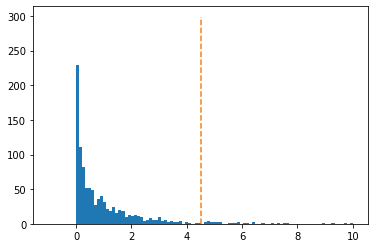

In [27]:
plt.hist(deviance_list,bins=100,range=(-1,10))

plt.plot([4.5]*300,range(0,300),"--")

In [29]:
array = np.array(deviance_list)
array[array>=4.5].shape

(37,)

In [30]:
chi = pd.Series(np.random.chisquare(1,1000))

print(chi[chi>=4.5].shape[0] / 1000)
print(chi.quantile(0.95))

0.045
4.052324571500668
